Collaborative coding using GitHub
===========

Alexandre Perera Luna, Mónica Rojas Martínez

December 15th 2023


# Goal

The objective of this assignment is to construct a project through collaborative coding, showcasing an Exploratory Data Analysis (EDA) and a classification. To facilitate your understanding of GitHub, we will utilize code snippets from previous exercises, allowing you to focus on the process without concerns about the final outcome. The current notebook will serve as the main function in the project, and each participant is required to develop additional components and integrate their contributions into the main branch.


## Requirements

In order to work with functions created in other jupyter notebooks you need to install the package `nbimporter` using a shell and the following command:

<font color='grey'>pip install nbimporter</font> 

`nbimporter` allows you to import jupyter notebooks as modules. Once intalled and imported, you can use a command like the following to import a function called *fibonacci* that is stored on a notebook *fibbo_func* in the same path as the present notebook:

<font color='green'>from</font> fibbo_func <font color='green'>import</font> fibbonaci  <font color='green'>as</font> fibbo



In [1]:
## Modify this cell by importing all the necessary modules you need to solve the assigmnent. Observe that we are importing
## the library nbimporter. You will need it for calling fuctions created in other notebooks. 
import nbimporter
import pandas as pd

In [2]:
# Here is an example of invoking the Fibonacci function, whisch should be located in the same directory as the main:
from fibbo_func import fibbonaci as fibbo
fibbo(24)

46368

## Exercises
As an illustration of Git workflow, you will analyze the *Parkinson's* dataset, which has been previously examined in past assignments. Each team member has specific responsibilities that may be crucial for the progress of others. Make sure all of you organize your tasks accordingly. We've structured the analysis into modules to assist you in tracking your tasks, but feel free to deviate from it if you prefer.   
Please use Markdown cells for describing your workflow and expalining the findings of your work. 
Remember you need both, to modify this notebook and, to create additional functions outside. Your work will only be available for others when you modify and merge your changes.


In [3]:
# We will start by loading the parkinson dataset. The rest is up to you!
df = pd.read_csv('parkinsons.data', 
                 dtype = { # indicate categorical variables
                     'status': 'category'})
df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### 1. Cleaning and tidying the dataset

In [4]:
dict_names = {'MDVP:Fo(Hz)':'avFF',
              'MDVP:Fhi(Hz)':'maxFF', 
              'MDVP:Flo(Hz)':'minFF',
              'MDVP:Jitter(%)': 'percJitter',
              'MDVP:Jitter(Abs)':'absJitter' ,
              'MDVP:RAP': 'rap',
              'MDVP:PPQ': 'ppq',
              'Jitter:DDP': 'ddp',
              'MDVP:Shimmer' : 'lShimer',
              'MDVP:Shimmer(dB)': 'dbShimer',
              'Shimmer:APQ3':'apq3',
              'Shimmer:APQ5': 'apq5',
              'MDVP:APQ':'apq',
              'Shimmer:DDA':'dda'}
# Rename variables
# from renamevars_function import renamevars
#df = renamevars(df, dict_names)
df = df.rename(columns=dict_names)
df.head(5)

,name,avFF,maxFF,minFF,percJitter,absJitter,rap,ppq,ddp,lShimer,...,dda,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### 2. Basic EDA based on plots and descriptive statistics

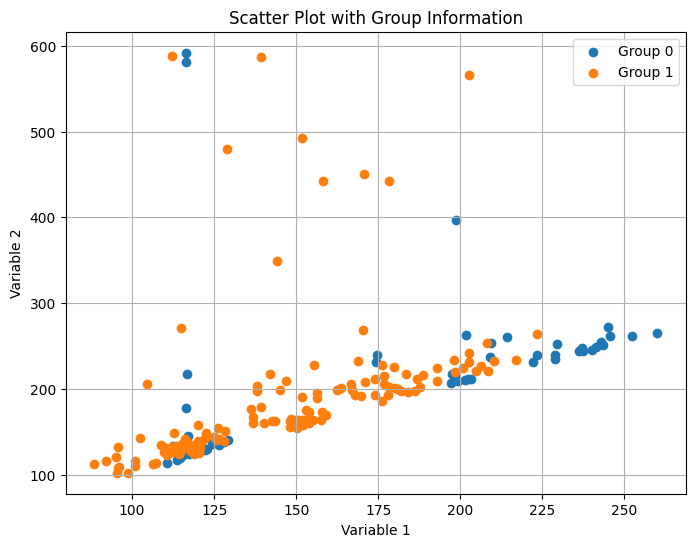

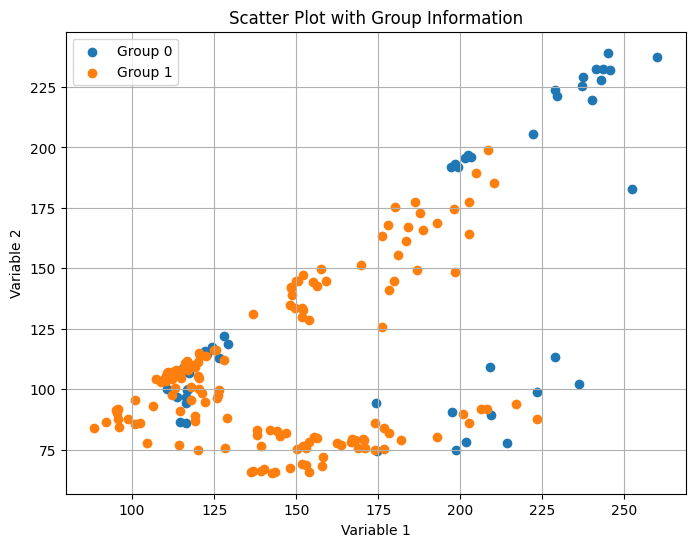

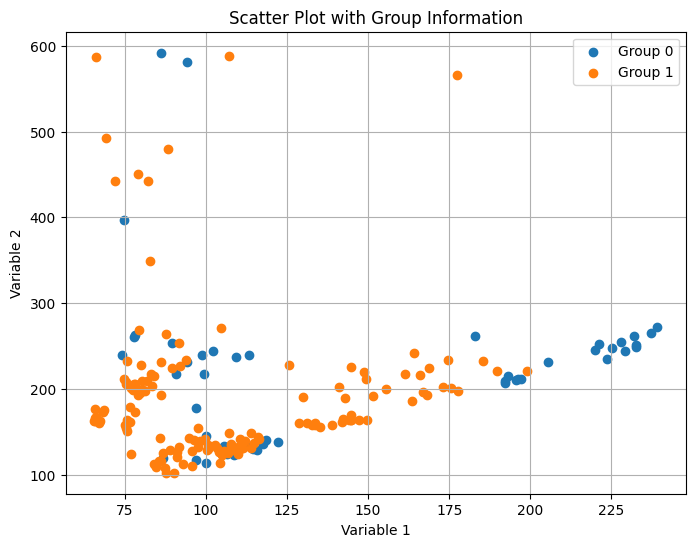

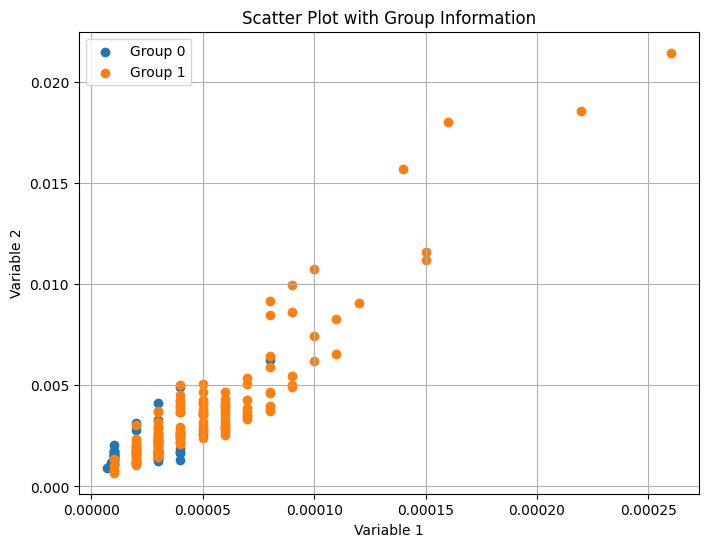

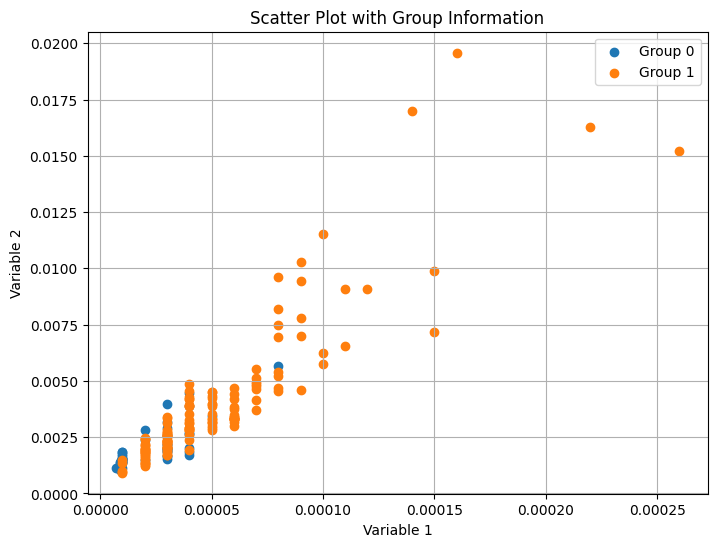

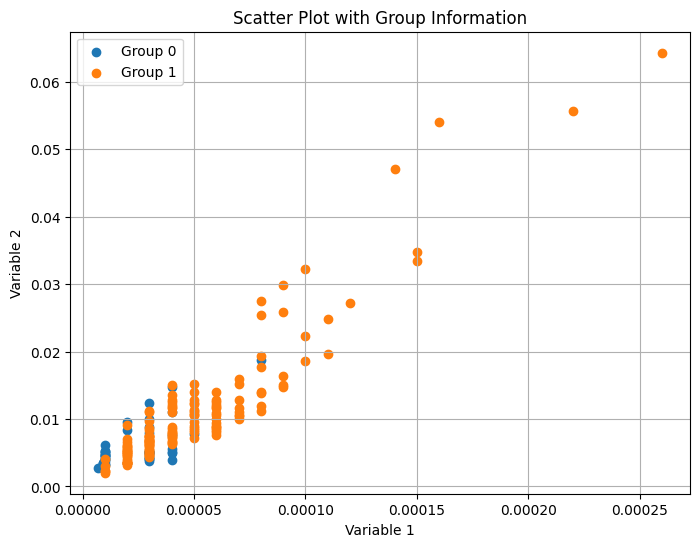

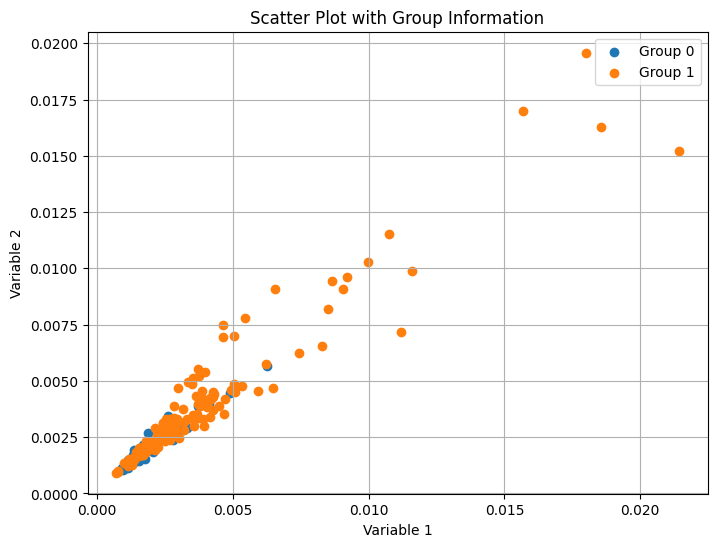

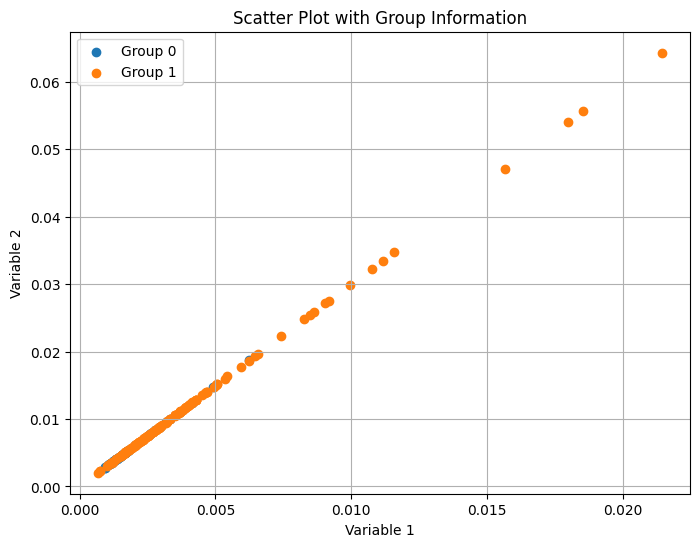

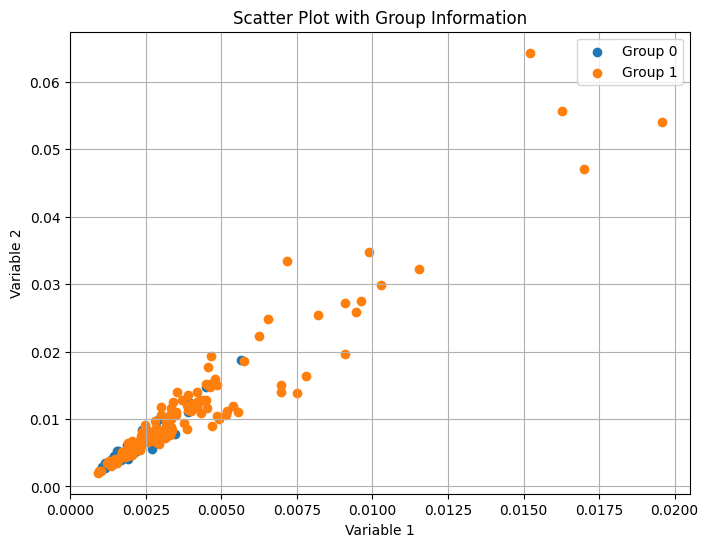

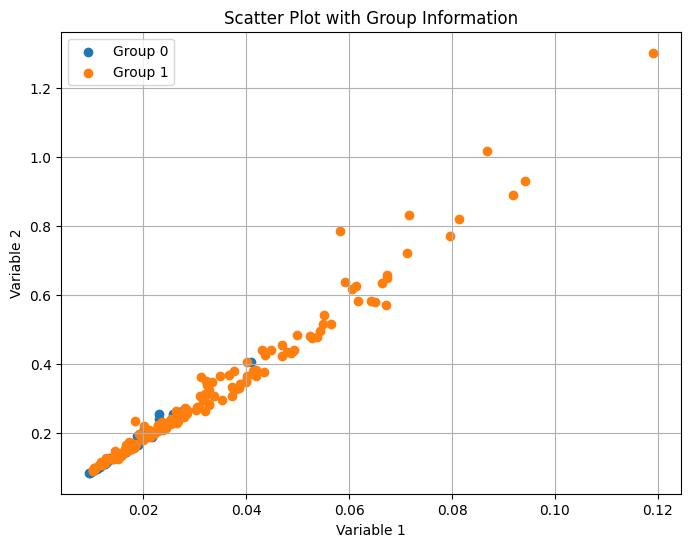

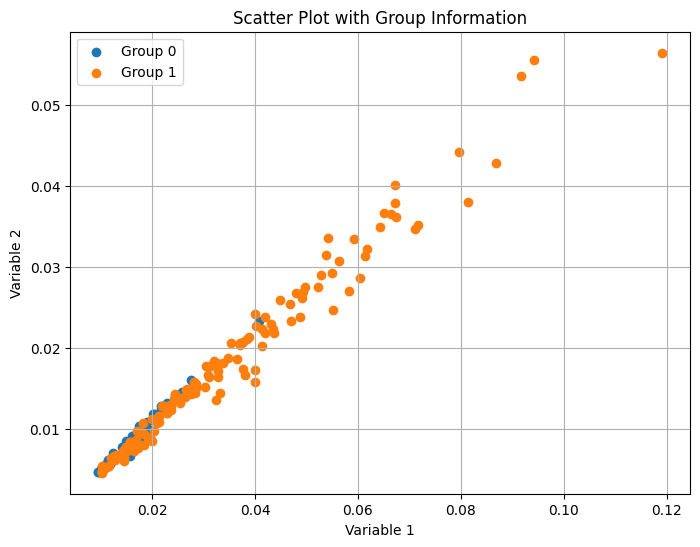

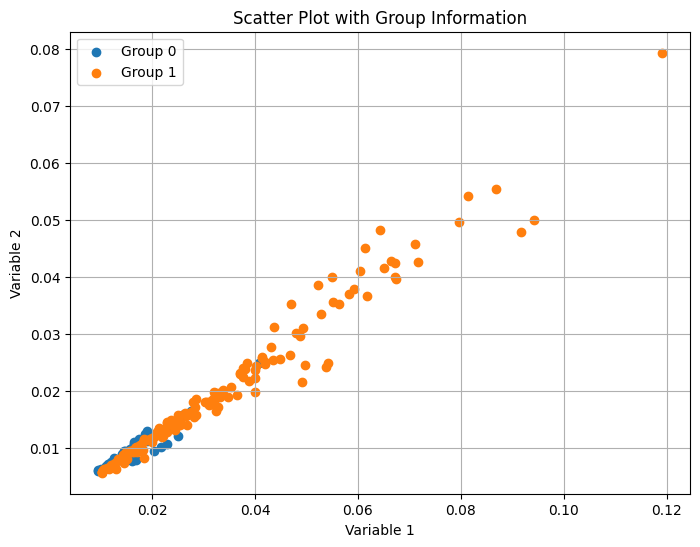

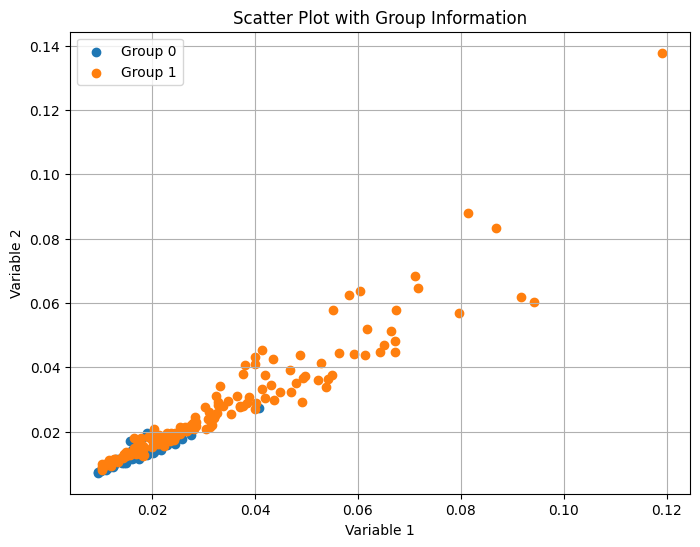

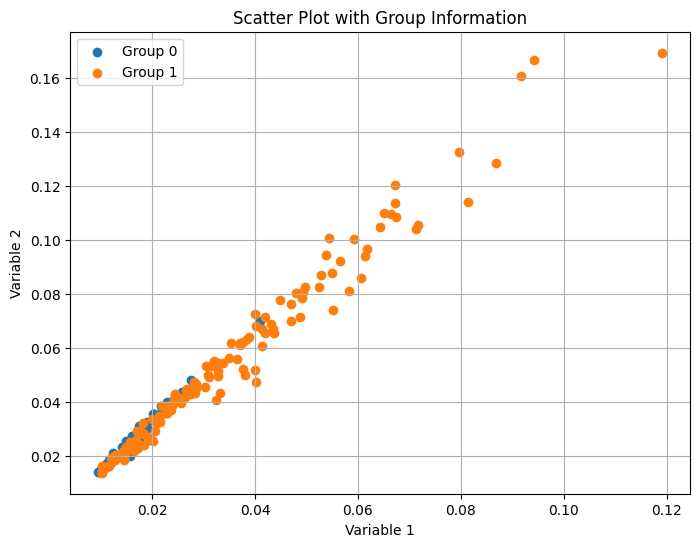

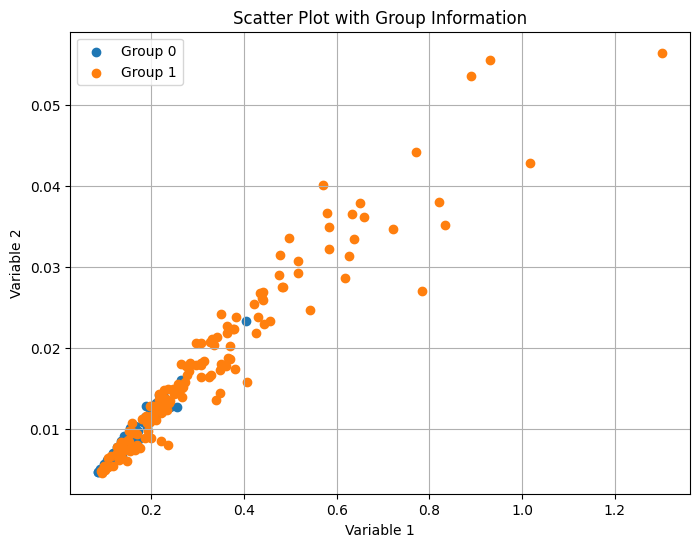

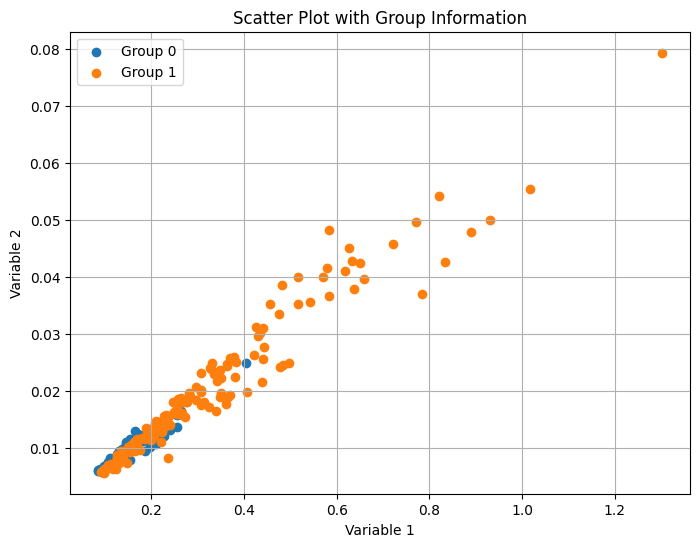

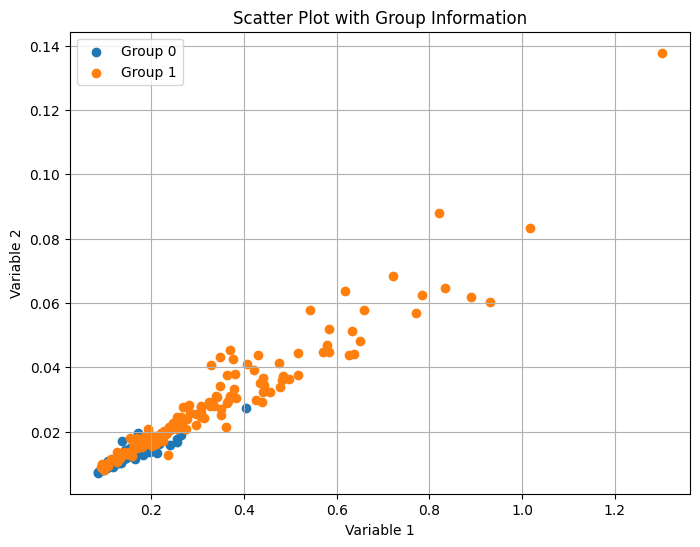

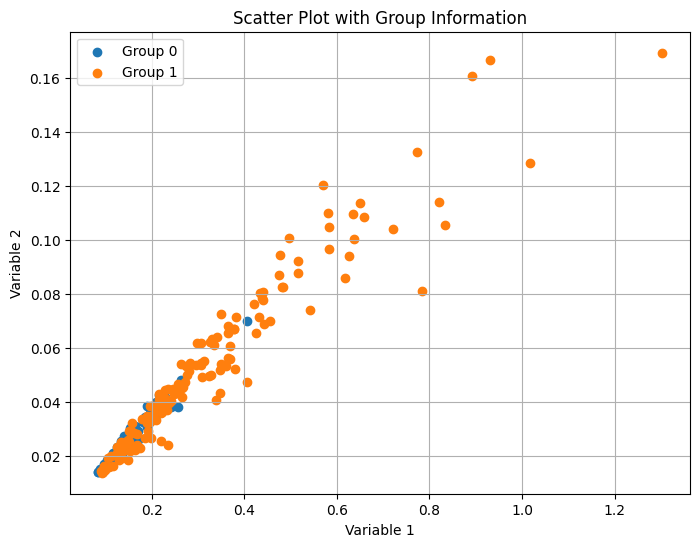

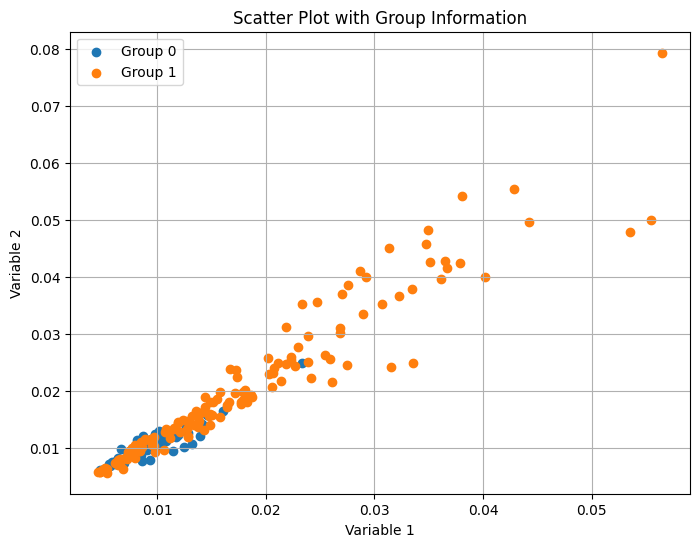

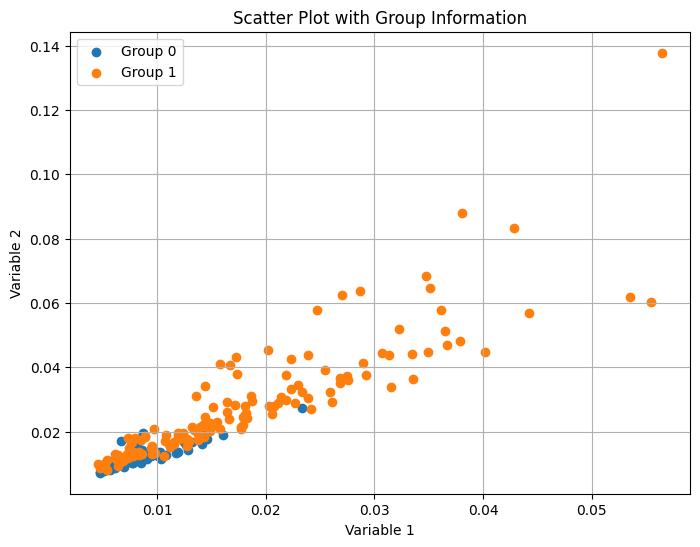

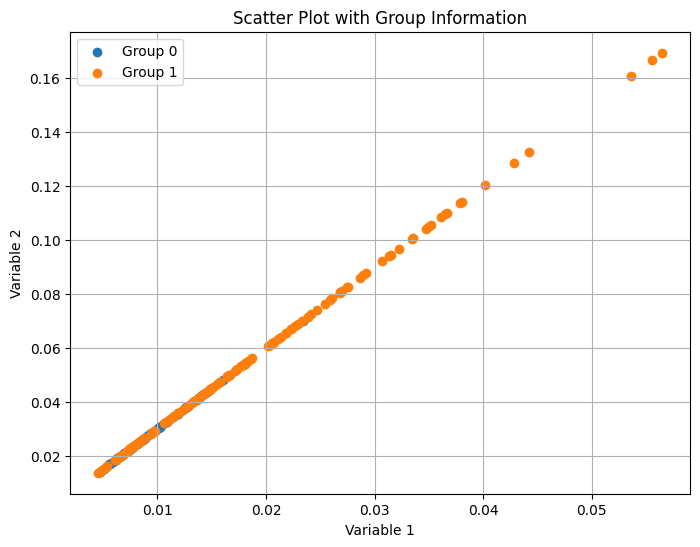

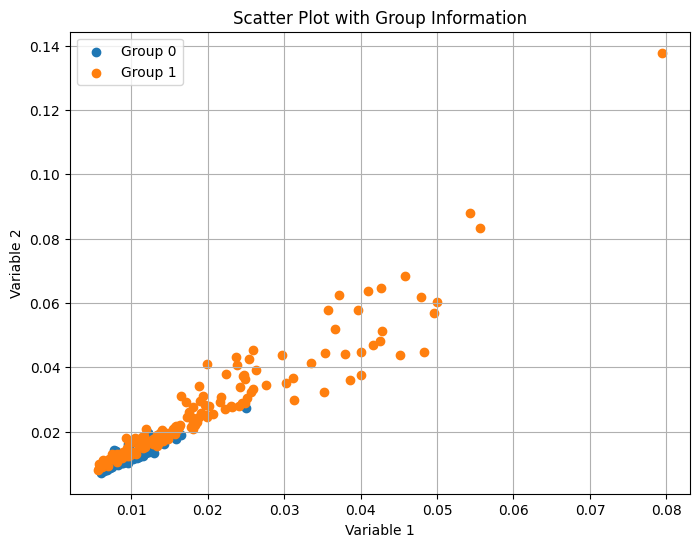

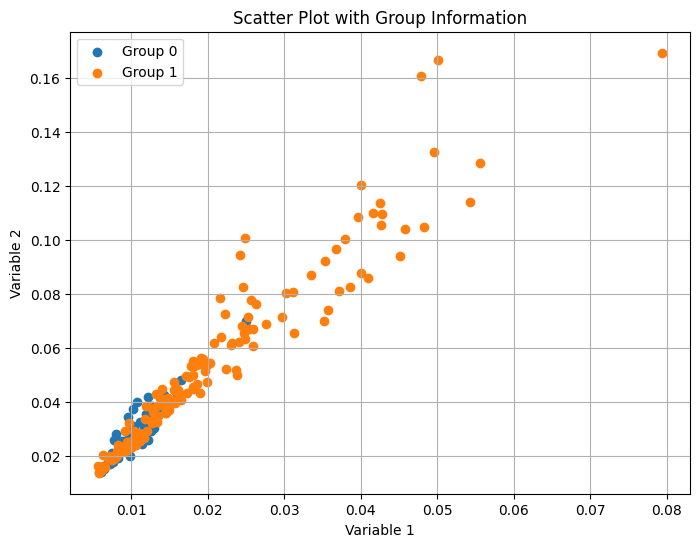

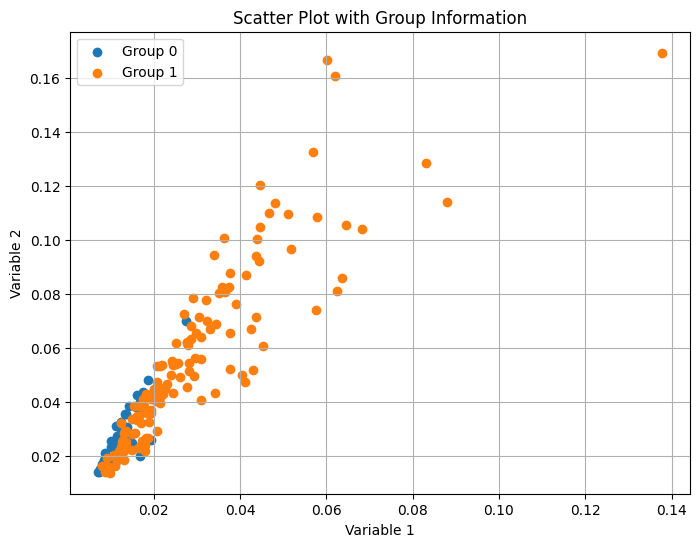

,name_x,minFF,NHR_x,HNR_x,status_x,RPDE_x,DFA_x,spread1_x,spread2_x,D2_x,...,dda,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,74.997,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,113.819,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,111.555,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,111.366,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,110.655,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
from scat_plt_function import scat_plt

# Fundamental frequency variables
fundamental_frequency_vars = df[['avFF', 'maxFF', 'minFF', 'status']]

# Generating the scatter plot using the scat_plt function
scat_plt(fundamental_frequency_vars['avFF'], fundamental_frequency_vars['maxFF'], fundamental_frequency_vars['status'])
scat_plt(fundamental_frequency_vars['avFF'], fundamental_frequency_vars['minFF'], fundamental_frequency_vars['status'])
scat_plt(fundamental_frequency_vars['minFF'], fundamental_frequency_vars['maxFF'], fundamental_frequency_vars['status'])

# Eliminates the columns that are not important for the fundamental frequency
cleaned_df_fundamental = df.drop(columns = ['avFF', 'maxFF','percJitter','absJitter','rap','ppq','ddp','lShimer','dbShimer','apq3', 'apq5', 'apq', 'dda'])

#########################################################################################################################################################################

# Jitter scatter plots
jitter_vars = df[['absJitter', 'rap', 'ppq', 'ddp', 'status']]

# Generating the scatter plot using the scat_plt function
scat_plt(jitter_vars['absJitter'], jitter_vars['rap'], jitter_vars['status'])
scat_plt(jitter_vars['absJitter'], jitter_vars['ppq'], jitter_vars['status'])
scat_plt(jitter_vars['absJitter'], jitter_vars['ddp'], jitter_vars['status'])
scat_plt(jitter_vars['rap'], jitter_vars['ppq'], jitter_vars['status'])
scat_plt(jitter_vars['rap'], jitter_vars['ddp'], jitter_vars['status'])
scat_plt(jitter_vars['ppq'], jitter_vars['ddp'], jitter_vars['status'])

# Eliminates the columns that are not important for the Jitter
cleaned_df_jitter = df.drop(columns = ['maxFF','minFF','avFF','percJitter','absJitter','lShimer','dbShimer','apq3','apq5','apq','dda'])

#######################################################################################################################################################

# Shimer scatter plots
shimer_vars = df[['lShimer', 'dbShimer', 'apq3', 'apq5', 'apq', 'dda', 'status']]

# Generating the scatter plot using the scat_plt function
scat_plt(shimer_vars['lShimer'],shimer_vars['dbShimer'],shimer_vars['status'] ) 
scat_plt(shimer_vars['lShimer'],shimer_vars['apq3'],shimer_vars['status'] ) 
scat_plt(shimer_vars['lShimer'],shimer_vars['apq5'],shimer_vars['status'] ) 
scat_plt(shimer_vars['lShimer'],shimer_vars['apq'],shimer_vars['status'] ) 
scat_plt(shimer_vars['lShimer'],shimer_vars['dda'],shimer_vars['status'] ) 
scat_plt(shimer_vars['dbShimer'],shimer_vars['apq3'],shimer_vars['status'] )
scat_plt(shimer_vars['dbShimer'],shimer_vars['apq5'],shimer_vars['status'] )
scat_plt(shimer_vars['dbShimer'],shimer_vars['apq'],shimer_vars['status'] ) 
scat_plt(shimer_vars['dbShimer'],shimer_vars['dda'],shimer_vars['status'] ) 
scat_plt(shimer_vars['apq3'],shimer_vars['apq5'],shimer_vars['status'] ) 
scat_plt(shimer_vars['apq3'],shimer_vars['apq'],shimer_vars['status'] ) 
scat_plt(shimer_vars['apq3'],shimer_vars['dda'],shimer_vars['status'] ) 
scat_plt(shimer_vars['apq5'],shimer_vars['apq'],shimer_vars['status'] )
scat_plt(shimer_vars['apq5'],shimer_vars['dda'],shimer_vars['status'] )
scat_plt(shimer_vars['apq'],shimer_vars['dda'],shimer_vars['status'] )

# Eliminates the columns that are not important for the Shimmer
cleaned_df_shimer = df.drop(columns=["minFF", "avFF", "maxFF", "percJitter", "absJitter", "rap", "ppq", "ddp", "apq", "apq5"])

########################################################################################################################################################

# Combine the cleaned dataframes
cleaned_df = pd.merge(cleaned_df_fundamental, cleaned_df_jitter, left_index=True, right_index=True).merge(cleaned_df_shimer, left_index=True, right_index=True)

# Now 'cleaned_df' contains only the representative variables for each category, with this instruction we see the first lines
cleaned_df.head(5)

In [6]:
# 1. Observation Count
observations = len(cleaned_df)
print(f"Total number of observations after cleaning: {observations}")

Total number of observations after cleaning: 195


In [7]:
# 2. Comparison between Controls and Patients
controls = cleaned_df[cleaned_df['status'] == '0']
patients = cleaned_df[cleaned_df['status'] == '1']

# Summary statistics for relevant features
control_summary = controls.describe()
patient_summary = patients.describe()

print("Summary statistics for controls:")
print(control_summary)

Summary statistics for controls:
            minFF      NHR_x     HNR_x     RPDE_x      DFA_x  spread1_x  \
count   48.000000  48.000000  48.00000  48.000000  48.000000  48.000000   
mean   145.207292   0.011483  24.67875   0.442552   0.695716  -6.759264   
std     58.757070   0.019088   3.43454   0.092199   0.051346   0.642782   
min     74.287000   0.000650  17.88300   0.256570   0.626710  -7.964984   
25%     98.243750   0.004188  22.99325   0.372126   0.654291  -7.257665   
50%    113.938500   0.004825  24.99700   0.435368   0.682527  -6.826448   
75%    199.183000   0.009213  26.13925   0.507748   0.742284  -6.350146   
max    239.170000   0.107150  33.04700   0.663842   0.785714  -5.198864   

       spread2_x       D2_x      PPE_x        rap  ...       apq3        dda  \
count  48.000000  48.000000  48.000000  48.000000  ...  48.000000  48.000000   
mean    0.160292   2.154491   0.123017   0.001925  ...   0.009504   0.028511   
std     0.062982   0.310269   0.044820   0.001066  

In [8]:
print("\nSummary statistics for patients:")
print(patient_summary)


Summary statistics for patients:
            minFF       NHR_x       HNR_x      RPDE_x       DFA_x   spread1_x  \
count  147.000000  147.000000  147.000000  147.000000  147.000000  147.000000   
mean   106.893558    0.029211   20.974048    0.516816    0.725408   -5.333420   
std     32.274358    0.044447    4.339143    0.101254    0.054786    0.970792   
min     65.476000    0.002310    8.441000    0.263654    0.574282   -7.120925   
25%     80.875500    0.008445   18.782000    0.439064    0.685569   -6.038300   
50%     99.770000    0.016580   21.414000    0.530529    0.726652   -5.440040   
75%    129.240000    0.027960   24.164500    0.604573    0.764868   -4.664067   
max    199.020000    0.314820   29.928000    0.685151    0.825288   -2.434031   

        spread2_x        D2_x       PPE_x         rap  ...        apq3  \
count  147.000000  147.000000  147.000000  147.000000  ...  147.000000   
mean     0.248133    2.456058    0.233828    0.003757  ...    0.017676   
std      0.077

The remove_outliers(df) function is responsible for identifying and removing outliers from a data set. It uses the quartiles (Q1 and Q3) and the interquartile range (IQR) to set upper and lower limits. It then filters the data set, retaining only those values that fall within these limits, thus eliminating potential outliers.

In [9]:
def remove_outliers(dataframe):
    for column in dataframe.select_dtypes(include=['number']).columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        dataframe.loc[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound), column] = None
    
    return dataframe

In [10]:
# Removing outliers of controls
controls_no_outliers = remove_outliers(controls)

controls_summary_no_outliers = controls_no_outliers.describe()
print("\nSummary statistics for controls without outliers:")
print(controls_summary_no_outliers)


Summary statistics for controls without outliers:
            minFF      NHR_x      HNR_x     RPDE_x      DFA_x  spread1_x  \
count   48.000000  42.000000  43.000000  48.000000  48.000000  48.000000   
mean   145.207292   0.005659  24.146372   0.442552   0.695716  -6.759264   
std     58.757070   0.003174   2.549427   0.092199   0.051346   0.642782   
min     74.287000   0.000650  19.020000   0.256570   0.626710  -7.964984   
25%     98.243750   0.004045  22.907500   0.372126   0.654291  -7.257665   
50%    113.938500   0.004770  24.775000   0.435368   0.682527  -6.826448   
75%    199.183000   0.007285  25.910000   0.507748   0.742284  -6.350146   
max    239.170000   0.013970  30.775000   0.663842   0.785714  -5.198864   

       spread2_x       D2_x      PPE_x        rap  ...       apq3        dda  \
count  47.000000  47.000000  47.000000  40.000000  ...  47.000000  47.000000   
mean    0.163569   2.170048   0.120264   0.001531  ...   0.009209   0.027627   
std     0.059383   0.294

In [11]:
# Removing outliers of patients
patients_no_outliers = remove_outliers(patients)

patients_summary_no_outliers = patients_no_outliers.describe()
print("\nSummary statistics for patients without outliers:")
print(patients_summary_no_outliers)


Summary statistics for patients without outliers:
            minFF       NHR_x       HNR_x      RPDE_x       DFA_x   spread1_x  \
count  147.000000  130.000000  143.000000  147.000000  147.000000  146.000000   
mean   106.893558    0.016439   21.300273    0.516816    0.725408   -5.353279   
std     32.274358    0.011584    3.924707    0.101254    0.054786    0.943697   
min     65.476000    0.002310   11.744000    0.263654    0.574282   -7.120925   
25%     80.875500    0.006868   18.905500    0.439064    0.685569   -6.044766   
50%     99.770000    0.012945   21.520000    0.530529    0.726652   -5.442590   
75%    129.240000    0.022178   24.295000    0.604573    0.764868   -4.682683   
max    199.020000    0.054700   29.928000    0.685151    0.825288   -2.839756   

        spread2_x        D2_x       PPE_x         rap  ...        apq3  \
count  147.000000  145.000000  143.000000  133.000000  ...  143.000000   
mean     0.248133    2.441074    0.227191    0.002888  ...    0.016703 

In [12]:
cleaned_dataframe = pd.concat([patients_no_outliers, controls_no_outliers])

### 3. Aggregating and transforming variables in the dataset

For doing a group_by across trials for each subject, it's needed to split the name column into subject_id and trial number:

In [13]:
df_names = cleaned_dataframe.name.str.split('_',expand=True)
# separate the string into segments using the character '_' as separator
# It would create one column for each segment
print(df_names.head()) # The first two columns are not relevant for our analisys so we can drop them
df_names.drop(df_names.columns[[0, 1]], axis =1, inplace = True) # drop the first two columns and modify the dataframe
df_names.columns = ['subject_id', 'trial'] # addnames to the respective columns for facilitating interpretation 

# Remove 'name' column from DataFrame original
cleaned_dataframe.drop('name_x', axis=1, inplace=True)

merged_dataframe = pd.concat([df_names, cleaned_dataframe], axis=1)

print(merged_dataframe.head())

      0    1    2  3
0  phon  R01  S01  1
1  phon  R01  S01  2
2  phon  R01  S01  3
3  phon  R01  S01  4
4  phon  R01  S01  5
  subject_id trial    minFF    NHR_x   HNR_x status_x    RPDE_x     DFA_x  \
0        S01     1   74.997  0.02211  21.033        1  0.414783  0.815285   
1        S01     2  113.819  0.01929  19.085        1  0.458359  0.819521   
2        S01     3  111.555  0.01309  20.651        1  0.429895  0.825288   
3        S01     4  111.366  0.01353  20.644        1  0.434969  0.819235   
4        S01     5  110.655  0.01767  19.649        1  0.417356  0.823484   

   spread1_x  spread2_x  ...      dda      NHR     HNR  status      RPDE  \
0  -4.813031   0.266482  ...  0.06545  0.02211  21.033       1  0.414783   
1  -4.075192   0.335590  ...  0.09403  0.01929  19.085       1  0.458359   
2  -4.443179   0.311173  ...  0.08270  0.01309  20.651       1  0.429895   
3  -4.117501   0.334147  ...  0.08771  0.01353  20.644       1  0.434969   
4  -3.747787   0.234513  ...  0

In [17]:
#from group_and_average import group_and_average

# Seleccionar solo columnas numéricas y la columna 'subject_id'
df_numeric = merged_dataframe.select_dtypes(include=['number']).join(merged_dataframe['subject_id'])
    
result = df_numeric.groupby('subject_id').mean().reset_index()
#result = group_and_average(merged_dataframe, 'trial')

result.head(5)

print(len(result))


32


### 4. Differentiating between controls (healthy subjects) and patients

In [ ]:
# your code here